<a href="https://colab.research.google.com/github/saivishwanathgoud/MachineLearning/blob/master/EDA_%26_Data_Visualization.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

IBM HR Analytics Employee Attrition & Performance

Refer to [Kaggle](https://www.kaggle.com/pavansubhasht/ibm-hr-analytics-attrition-dataset) for information on dataset and description

In [ ]:
!pip install pandas==0.23.4

In [ ]:
#importing required packages 

import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns 
%matplotlib inline
sns.set(style="darkgrid")
from sklearn.preprocessing import LabelEncoder
from sklearn import preprocessing
le = preprocessing.LabelEncoder()

In [ ]:
data = pd.read_csv('HR-Employee-Attrition.csv')
data.shape

(1470, 35)

In [ ]:
#creating a new dataframe to preserve initial data 
df = data.copy()
df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,2,Female,94,3,2,Sales Executive,4,Single,5993,19479,8,Y,Yes,11,3,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,3,Male,61,2,2,Research Scientist,2,Married,5130,24907,1,Y,No,23,4,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,4,Male,92,2,1,Laboratory Technician,3,Single,2090,2396,6,Y,Yes,15,3,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,4,Female,56,3,1,Research Scientist,3,Married,2909,23159,1,Y,Yes,11,3,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,1,Male,40,3,1,Laboratory Technician,2,Married,3468,16632,9,Y,No,12,3,4,80,1,6,3,3,2,2,2,2


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
Age                         1470 non-null int64
Attrition                   1470 non-null object
BusinessTravel              1470 non-null object
DailyRate                   1470 non-null int64
Department                  1470 non-null object
DistanceFromHome            1470 non-null int64
Education                   1470 non-null int64
EducationField              1470 non-null object
EmployeeCount               1470 non-null int64
EmployeeNumber              1470 non-null int64
EnvironmentSatisfaction     1470 non-null int64
Gender                      1470 non-null object
HourlyRate                  1470 non-null int64
JobInvolvement              1470 non-null int64
JobLevel                    1470 non-null int64
JobRole                     1470 non-null object
JobSatisfaction             1470 non-null int64
MaritalStatus               1470 non-null object
MonthlyIncome         

no null values in the data

In [ ]:
df.describe()

,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,MonthlyRate,NumCompaniesWorked,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1470.000000,1470.000000,1470.000000,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
mean,36.923810,802.485714,9.192517,2.912925,1.0,1024.865306,2.721769,65.891156,2.729932,2.063946,2.728571,6502.931293,14313.103401,2.693197,15.209524,3.153741,2.712245,80.0,0.793878,11.279592,2.799320,2.761224,7.008163,4.229252,2.187755,4.123129
std,9.135373,403.509100,8.106864,1.024165,0.0,602.024335,1.093082,20.329428,0.711561,1.106940,1.102846,4707.956783,7117.786044,2.498009,3.659938,0.360824,1.081209,0.0,0.852077,7.780782,1.289271,0.706476,6.126525,3.623137,3.222430,3.568136
min,18.000000,102.000000,1.000000,1.000000,1.0,1.000000,1.000000,30.000000,1.000000,1.000000,1.000000,1009.000000,2094.000000,0.000000,11.000000,3.000000,1.000000,80.0,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,30.000000,465.000000,2.000000,2.000000,1.0,491.250000,2.000000,48.000000,2.000000,1.000000,2.000000,2911.000000,8047.000000,1.000000,12.000000,3.000000,2.000000,80.0,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,36.000000,802.000000,7.000000,3.000000,1.0,1020.500000,3.000000,66.000000,3.000000,2.000000,3.000000,4919.000000,14235.500000,2.000000,14.000000,3.000000,3.000000,80.0,1.000000,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000
75%,43.000000,1157.000000,14.000000,4.000000,1.0,1555.750000,4.000000,83.750000,3.000000,3.000000,4.000000,8379.000000,20461.500000,4.000000,18.000000,3.000000,4.000000,80.0,1.000000,15.000000,3.000000,3.000000,9.000000,7.000000,3.000000,7.000000
max,60.000000,1499.000000,29.000000,5.000000,1.0,2068.000000,4.000000,100.000000,4.000000,5.000000,4.000000,19999.000000,26999.000000,9.000000,25.000000,4.000000,4.000000,80.0,3.000000,40.000000,6.000000,4.000000,40.000000,18.000000,15.000000,17.000000


In [ ]:
df.drop(['EmployeeNumber', 'Over18', 'StockOptionLevel', 'RelationshipSatisfaction', 'MonthlyRate', 'DailyRate' ], axis = 1, inplace = True)

In [ ]:
from pandas_profiling import ProfileReport

In [ ]:
report = ProfileReport(df)
report

Number of variables,29
Number of observations,1470
Total Missing (%),0.0%
Total size in memory,333.1 KiB
Average record size in memory,232.1 B
Numeric,17
Categorical,8
Boolean,1
Date,0
Text (Unique),0
Rejected,3


In [ ]:
#saving profiling report to HTML file
report.to_file("Attrition.html")

In [ ]:
df['Attrition'] = df['Attrition'].map({ 'No': 0, 'Yes': 1})

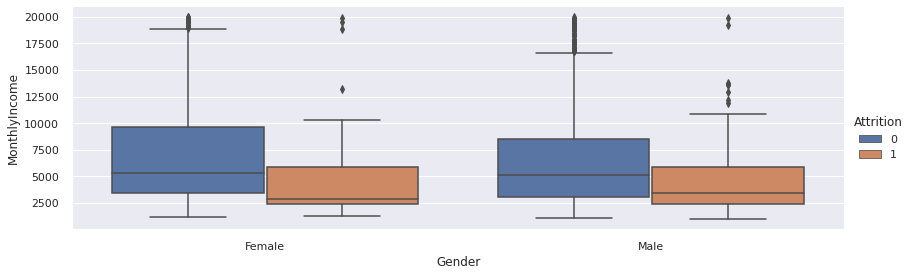

In [ ]:
sns.catplot(x='Gender', y='MonthlyIncome', 
            data=df, hue = 'Attrition',
            kind='box',
            height=4, aspect=3)
plt.show()

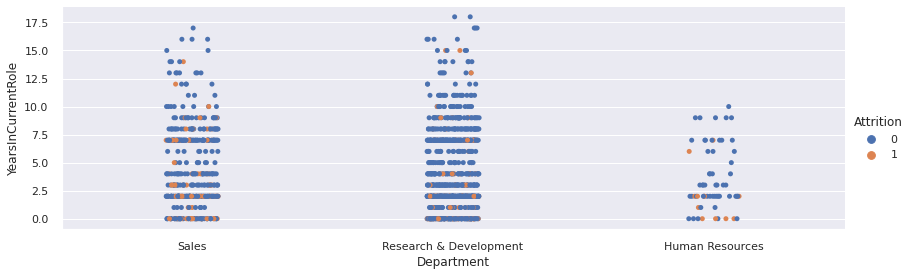

In [ ]:
sns.catplot(x='Department', y='YearsInCurrentRole', 
            data=df, hue = 'Attrition', 
            height=4, aspect=3)
plt.show()

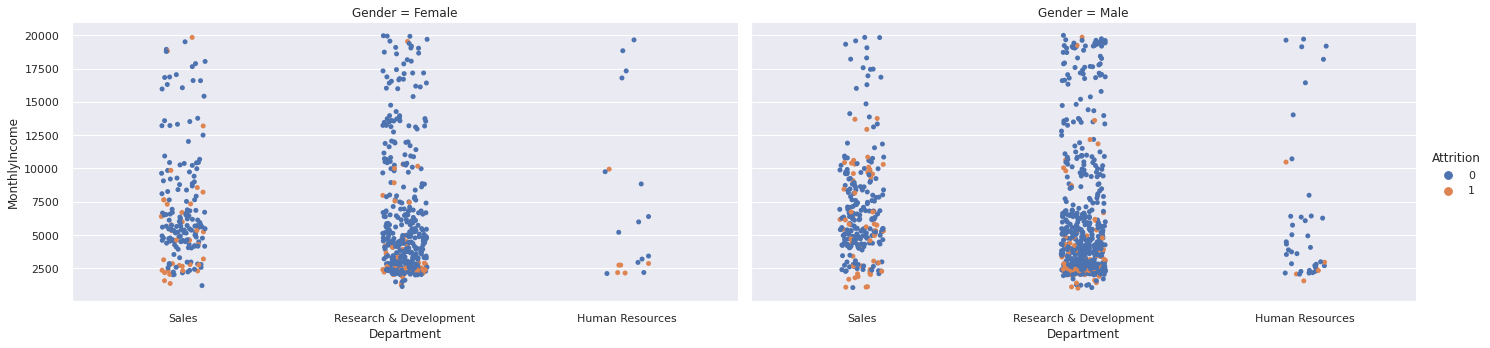

In [ ]:
sns.catplot(x="Department", y="MonthlyIncome", hue="Attrition",
                col="Gender", data=df, aspect = 2)
plt.show()

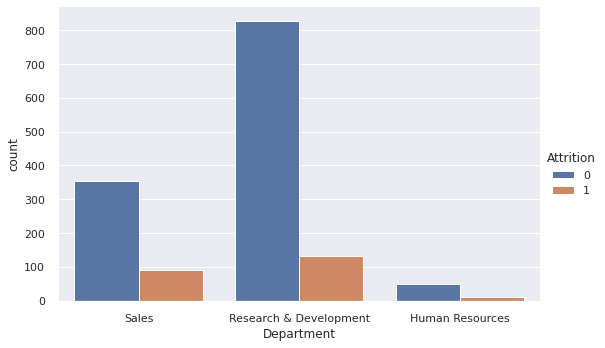

In [ ]:
sns.catplot(x="Department", kind="count", hue = 'Attrition', data= df, aspect = 1.5, height = 5)
plt.show()

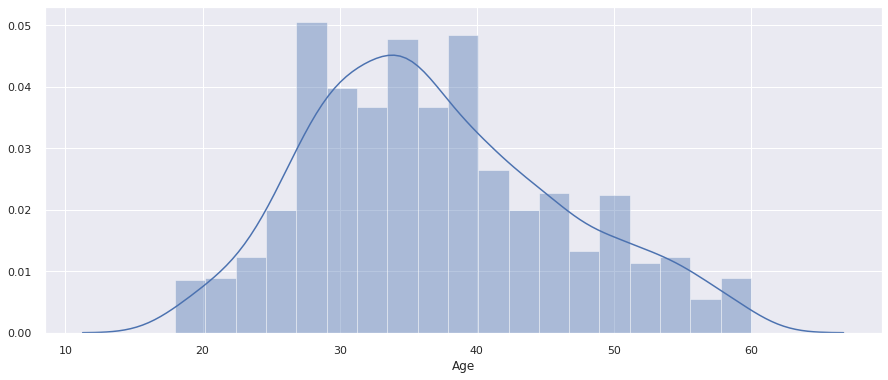

In [ ]:
sns.set(font_scale=1) 
plt.subplots(figsize=(15, 6))
sns.distplot(df['Age'])
plt.show()

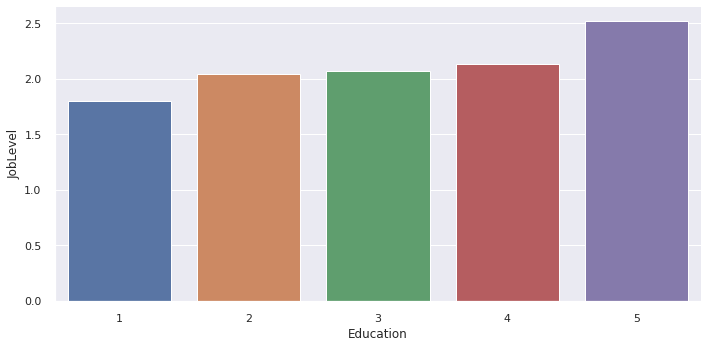

In [ ]:
#Eductaion v/s job level
sns.catplot(x = 'Education', y= 'JobLevel', kind = 'bar', data = df, ci=None, aspect = 2)

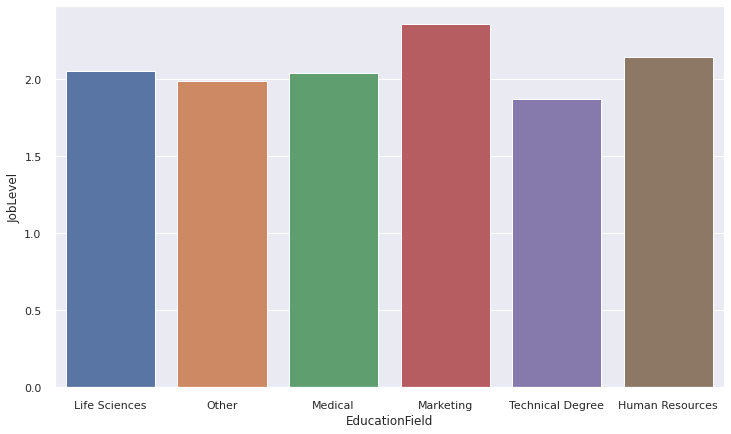

In [ ]:
#Education field vs job level
plt.figure(figsize=(12, 7))
sns.barplot(x = 'EducationField', y= 'JobLevel', data = df, ci=None)

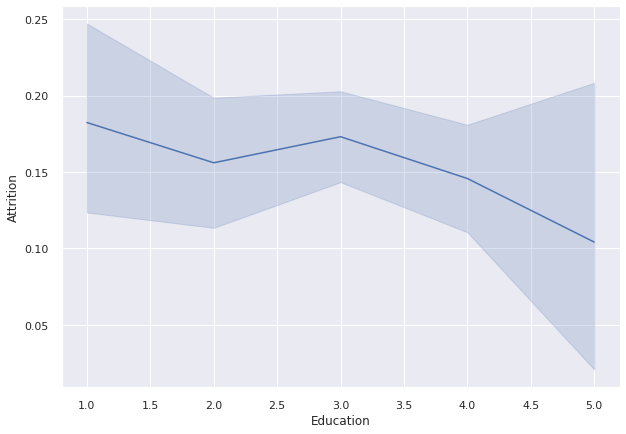

In [ ]:
plt.figure(figsize=(10, 7))
sns.lineplot(x="Education", y="Attrition", data=df)

<Figure size 720x432 with 0 Axes>

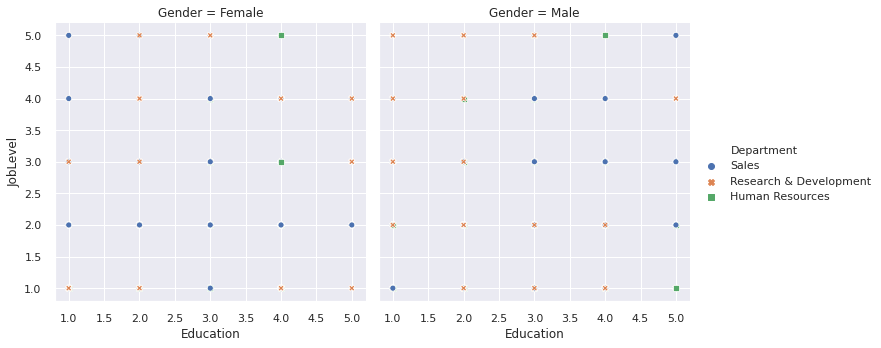

In [ ]:
sns.relplot(x="Education", y="JobLevel",
                 col="Gender", hue="Department", style="Department",
                 kind="scatter", data=df,)

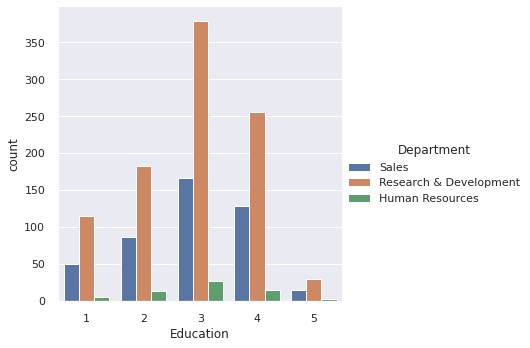

In [ ]:
sns.catplot(x = 'Education', kind = 'count', data = df, hue = 'Department')

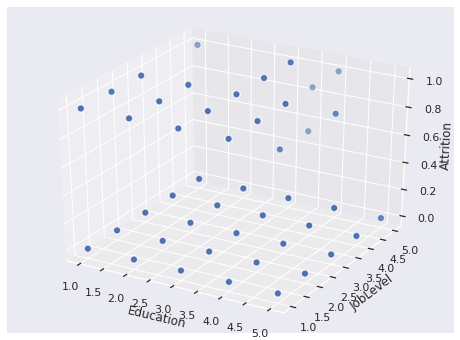

In [ ]:
fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111, projection='3d')

xs = df['Education']
ys = df['JobLevel']
zs = df['Attrition']
ax.scatter(xs, ys, zs, s=50, alpha=0.6, edgecolors='w')

ax.set_xlabel('Education')
ax.set_ylabel('JobLevel')
ax.set_zlabel('Attrition')

plt.show()